# Position Players for the Green Bay Packers to Target in the 2019 NFL Draft
###### By Tommy Evans-Barton, Mediocre Data Scientist and Diehard Packers Fan

## Introduction

This year, the Green Bay Packers are in the unfamiliar position of having a new head coach, Matt LaFleur, and with him, an entirely new offense predicated on the "illusion of complexity" and the zone running scheme. While we could go on and on analyzing this scheme, a lot of people have already done this (I particularly like __[this](http://www.packtothefuture.com/articles/xs-and-os-lafleurs-pass-game-in-week-2/)__ series of breakdowns by *Pack to the Future's* Ben Clubb), and maybe I will too in the future. However, for now, I wanted to try to do something a little bit different.


It's no secret that there have been some issues with the skill positions (Wide Receivers, Tight Ends, and Running Backs) in the past few seasons for the Packers. For Wide Receivers, it's a case of injuries and inexperience, with rookies playing heavy snap percentages on offense (Data courtesy of __[Football Outsiders](https://www.footballoutsiders.com/stats/snapcounts)__):

| Rookie | Offensive Snap Percentage|
|---|---|
| M. Valdes-Scantling | 64.4% |
| E. St. Brown | 33.3% |
| J. Moore | 6.9% |
| J. Kumerow | 12.7% |


due to injuries to Randall Cobb and Geronimo Allison. For the Tight End room, Jimmy Graham and Marcedes Lewis have been hit hard by father time, and Lance Kendricks, in my dad's words, is a J.A.G (Just A Guy). Running backs have also felt the sting of injury, with Aaron Jones having the second knee injury of his NFL career in 2018, but unlike in the case of the other two positions, their borderline *criminal* misusage last year causes me to withhold judgement, at least for another season.


All of this is to say that the skill players could use an upgrade, or at the very least some reenforcements. But who will fit this new coach's schemes? Who can answer the call? That's what we hope to find out, so don't touch that dial.


In terms of success running this scheme, no two coaches have shown more promise than Los Angeles's Sean McVay and San Francisco's Kyle Shanahan, coincidentally Matt LaFleur's two mentors. With the relative success of these two schemes (yes I know the 49ers went 4-12, but considering they were starting Nick Mullens, I'll cut Shanahan some slack) it seems reasonable to assume that LaFleur may try to acquire like-players to those currently in LA and SF. And while Free Agency is, in my mind, a band-aid for flaws, true, lasting improvement only comes through the draft.

In this analysis, we're going to go in depth on the position players that have helped catapult this new-age scheme into popularity, and use an analysis of their attributes, testing, and college statistics to hopefully help us find similar players and future contributors in this year's draft. Ready? Let's do this.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import SkillPlayerFunctions as spf

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from scipy.stats import linregress
from scipy.stats import percentileofscore
import os

***

## A Note on Coding, and Some Terms to Know

I know a lot of people who may be reading this just looked at the cell above and said "Uh-uh this ain't it chief," or "Well that's the second nerdiest thing I've ever seen" and to be honest that second one is spot on. I'm doing this analysis in the only way I know how, with Python, but I know a lot of people reading this won't have a very strong background in coding or statistics, and may find a lot of the code hard to follow, or even intimidating. But I want this breakdown to be able to cater to everyone: the stats nerds (like me), the arm-chair GM's (also me), and the casual fans who tune in every other week. That means I'll be doing my best to explain:

1. Why I decided to do what I did when it comes to the data
2. What each method that I wrote is aiming to do
3. How the code aims to do this (where an explanation is easy)
4. What the statistical conclusions mean

and anything else that may come up along the way.

There are, however, some terms I may use casually that you might want to know, such as:

- **Cell** - what you're reading this in right now! It can either be filled with text, like this one, or with code, like the one above.

- **Function** - essentially a section of code that will give you a value or values at the end. What this value is (a number vs. a group of numbers vs. a word) depends on the function, and can really be almost anything

- **Null/NaN(Not a Number)** - this means exactly what you think it means: Nothing. This happens in a data set when there's just nothing put in. It can either happen on purpose (i.e. if a receiver didn't play any games, their receiving yards might be `Null/NaN`, with no value entered for them) or on accident (i.e. someone forgot to put a piece of data in). The second of these is unlikely in our dataset, but just keep in mind that it CAN happen.

- **DataFrame** - whenever I say this, you can pretty much replace it with the word 'table'. They're basically the same thing, a DataFrame is just the coding word for this specific type of table.

- **Map** - when we take one value and replace it with another one



Moral of the story, try not to get too worried about the code or the tables (unless you want to), and just get as into it as you want. Any feedback is more than welcome, so hit me up with those comments, questions, and concerns. And for those of you who DO find code interesting, the .py file is in the directory. So, without further ado, let's do some cool ass football data shit!

***

## Original NFL Player Data
Our NFL data is going to come from a mix of places, but mostly from __[Pro Football Reference](https://www.pro-football-reference.com/)__, so a huge shoutout to them for having a good source to draw from. What we're going to do first is look at the 49ers' and Rams' rosters. I've loaded the 2017 and 2018 rosters below and combined them with a bit of initial cleaning.

In [52]:
sf_2018_roster = pd.read_csv('data/49ersRoster.csv') #This is the complete San Francisco 49ers 2018 Roster
rams_2018_roster = pd.read_csv('data/RamsRoster.csv') #This is the complete Los Angeles Rams 2018 Roster
sf_2017_roster = pd.read_csv('data/49ers2017Roster.csv')
rams_2017_roster = pd.read_csv('data/Rams2017Roster.csv')

Below, I have combined the two years for each team into one table per team, gotten rid of the entries where there wasn't a position listed, and then gotten rid of duplicate players.

In [54]:
sf_full_roster = pd.concat([sf_2018_roster, sf_2017_roster])
sf_full_roster = sf_full_roster.dropna(subset = ['Pos'])
sf_full_roster = sf_full_roster[~(sf_full_roster.duplicated('Player', keep = 'first'))]
rams_full_roster = pd.concat([rams_2018_roster, rams_2017_roster])
rams_full_roster = rams_full_roster.dropna(subset = ['Pos'])
rams_full_roster = rams_full_roster[~(rams_full_roster.duplicated('Player', keep = 'first'))]

In [56]:
sf_full_roster.head()

,No.,Player,Age,Pos,G,GS,Wt,Ht,College/Univ,BirthDate,Yrs,AV,Drafted (tm/rnd/yr),Salary
0,4.0,Nick Mullens\MullNi00,23.0,QB,8,8.0,210.0,6-1,Southern Miss,3/21/1995,Rook,6.0,NaN,$129200
1,10.0,Jimmy Garoppolo\GaroJi00,27.0,qb,3,3.0,225.0,6-2,East. Illinois,11/2/1991,4,2.0,New England Patriots / 2nd / 62nd pick / 2014,$6200000
2,3.0,C.J. Beathard\BeatC.00,25.0,qb,6,5.0,215.0,6-2,Iowa,11/16/1993,1,3.0,San Francisco 49ers / 3rd / 104th pick / 2017,$625393
3,41.0,Jeff Wilson\WilsJe01,23.0,rb,6,2.0,194.0,6-0,NaN,11/16/1995,Rook,2.0,NaN,$129200
4,36.0,Alfred Morris\MorrAl00,30.0,rb,12,1.0,224.0,5-10,Florida Atlantic,12/12/1988,6,3.0,Washington Redskins / 6th / 173rd pick / 2012,$790000


In [57]:
rams_full_roster.head()

,No.,Player,Age,Pos,G,GS,Wt,Ht,College/Univ,BirthDate,Yrs,AV,Drafted (tm/rnd/yr),Salary
2,35.0,C.J. Anderson\AndeC.00,27.0,rb,2,2.0,225.0,5-8,California,2/10/1991,5,2.0,NaN,$92941
3,26.0,Mark Barron\BarrMa00,29.0,LB,12,12.0,230.0,6-2,Alabama,10/27/1989,6,5.0,Tampa Bay Buccaneers / 1st / 7th pick / 2012,$6499999
4,66.0,Austin Blythe\BlytAu00,26.0,RG,16,16.0,298.0,6-3,Iowa,6/16/1992,2,10.0,Indianapolis Colts / 7th / 248th pick / 2016,$630000
5,90.0,Michael Brockers\BrocMi00,28.0,DE,16,16.0,305.0,6-5,LSU,12/21/1990,6,7.0,St. Louis Rams / 1st / 14th pick / 2012,$5250000
9,12.0,Brandin Cooks\CookBr00,25.0,WR,16,16.0,183.0,5-10,Oregon St.,9/25/1993,4,13.0,New Orleans Saints / 1st / 20th pick / 2014,$4000000


***

### Cleaning the Original Player Data

Unfortunately, as is often the case, our data is still neither complete nor perfect, and there's a lot of work to be done on it. To be honest, unless you're extremely interested in the nitty-gritty of data science, I recommend you skip through this part (ahead to [Players to Use as Prototypes](#Players-to-Use-as-Prototypes)), because preprocessing data is a little annoying, even more boring, and overall doesn't need to be fully read through to understand the analysis at the end.

As we said before, we only care about the skill positions, but this data has every player, so we're going to filter out the players we don't care about with the function below, as well as get rid of entries that don't have a position listed (`NaN` entries) and clean the position data so that it's uniformly formatted (in this case this just means we're making all the positions upper case. It'll just make working with the data easier later).

In [58]:
sf_skill_positions = spf.clean_position(sf_full_roster)
rams_skill_positions = spf.clean_position(rams_full_roster)
#See the attached .py file for the code that does this

In [59]:
sf_skill_positions

,No.,Player,Age,Pos,G,GS,Wt,Ht,College/Univ,BirthDate,Yrs,AV,Drafted (tm/rnd/yr),Salary
0,41.0,Jeff Wilson\WilsJe01,23.0,RB,6,2.0,194.0,6-0,NaN,11/16/1995,Rook,2.0,NaN,$129200
1,36.0,Alfred Morris\MorrAl00,30.0,RB,12,1.0,224.0,5-10,Florida Atlantic,12/12/1988,6,3.0,Washington Redskins / 6th / 173rd pick / 2012,$790000
2,22.0,Matt Breida\BreiMa00,23.0,RB,14,13.0,190.0,5-10,Georgia Southern,2/28/1995,1,6.0,NaN,$555000
3,18.0,Dante Pettis\PettDa00,23.0,WR,12,7.0,195.0,6-1,Washington,10/23/1995,Rook,3.0,San Francisco 49ers / 2nd / 44th pick / 2018,$480000
4,13.0,Richie James\JameRi00,23.0,WR,13,2.0,185.0,5-9,Middle Tenn. St.,9/5/1995,Rook,2.0,San Francisco 49ers / 7th / 240th pick / 2018,$480000
5,11.0,Marquise Goodwin\GoodMa00,28.0,WR,11,8.0,180.0,5-9,Texas,11/19/1990,5,3.0,Buffalo Bills / 3rd / 78th pick / 2013,$1450000
6,15.0,Pierre Garcon\GarcPi00,32.0,WR,8,8.0,211.0,6-0,Mount Union,8/8/1986,10,2.0,Indianapolis Colts / 6th / 205th pick / 2008,$6625000
7,84.0,Kendrick Bourne\BourKe00,23.0,WR,16,8.0,203.0,6-1,East. Washington,8/4/1995,1,4.0,NaN,$555000
8,85.0,George Kittle*\KittGe00,25.0,TE,16,16.0,250.0,6-4,Iowa,10/9/1993,1,10.0,San Francisco 49ers / 5th / 146th pick / 2017,$555000
9,88.0,Garrett Celek\CeleGa00,30.0,TE,15,1.0,252.0,6-5,Michigan St.,5/29/1988,6,1.0,NaN,$1650000


In [60]:
rams_skill_positions

,No.,Player,Age,Pos,G,GS,Wt,Ht,College/Univ,BirthDate,Yrs,AV,Drafted (tm/rnd/yr),Salary
0,35.0,C.J. Anderson\AndeC.00,27.0,RB,2,2.0,225.0,5-8,California,2/10/1991,5,2.0,NaN,$92941
1,12.0,Brandin Cooks\CookBr00,25.0,WR,16,16.0,183.0,5-10,Oregon St.,9/25/1993,4,13.0,New Orleans Saints / 1st / 20th pick / 2014,$4000000
2,30.0,Todd Gurley*+\GurlTo01,24.0,RB,14,14.0,224.0,6-1,Georgia,8/3/1994,3,16.0,St. Louis Rams / 1st / 10th pick / 2015,$950000
3,89.0,Tyler Higbee\HigbTy00,25.0,TE,16,16.0,255.0,6-6,Western Kentucky,1/1/1993,2,3.0,Los Angeles Rams / 4th / 110th pick / 2016,$630000
4,18.0,Cooper Kupp\KuppCo00,25.0,WR,8,8.0,208.0,6-2,East. Washington,6/15/1993,1,6.0,Los Angeles Rams / 3rd / 69th pick / 2017,$640000
5,83.0,Josh Reynolds\ReynJo00,23.0,WR,16,8.0,196.0,6-3,Texas A&M,2/16/1995,1,4.0,Los Angeles Rams / 4th / 117th pick / 2017,$555000
6,17.0,Robert Woods\WoodRo02,26.0,WR,16,16.0,195.0,6-0,USC,4/10/1992,5,14.0,Buffalo Bills / 2nd / 41st pick / 2013,$790000
7,11.0,Tavon Austin\AustTa00,27.0,WR,16,9.0,179.0,5-8,West Virginia,3/15/1990,4,3.0,St. Louis Rams / 1st / 8th pick / 2013,$3500000
8,34.0,Malcolm Brown\BrowMa03,24.0,RB,11,1.0,222.0,5-11,Texas,5/15/1993,2,2.0,NaN,$540000
9,86.0,Derek Carrier\CarrDe00,27.0,TE,14,3.0,244.0,6-4,Beloit,7/25/1990,5,1.0,NaN,$950000


So now we've cleaned this data a little bit, but we've still got a few problems with it:


1. We have columns we don't care about. We care about the player, their traits, their stats, their college and when they were drafted (because this will help us find some more information on them later), and that's about it. We're going to get rid of all the other extra stuff.

2. If you look at the player entries, there's a whole bunch of nonsense after they're names because of the way the data was downloaded. We want to get rid of this, not only to make it look prettier, but also to make it easier to use. Side note, George Kittle still has a duplicate, because of an issue with markers (look at the asterisk in the first entry) for whether or not someone made an All-Pro/ProBowl team.

To do the first one, we'll write a quick function to get rid of the columns we don't want and run each DataFrame through it:

In [61]:
sf_skill_positions = spf.drop_unnecessary_columns_rosters(sf_skill_positions)
rams_skill_positions = spf.drop_unnecessary_columns_rosters(rams_skill_positions)

Similarly with the second issue, we'll have to write a (slightly more complicated) function, and run IT on each DataFrame:

In [62]:
sf_skill_positions = spf.clean_player_column(sf_skill_positions)
rams_skill_positions = spf.clean_player_column(rams_skill_positions)

***

## Combining with NFL Statistics

So we've made some progress, but we want statistics to go along with these players, or else this information isn't all that useful. So we're going to have to go get more data, and for our purposes we'll be using 2017 and 2018 because these are the years that McVay and Shanahan were head coaches for their respective teams. The data is loaded in below, again from __[Pro Football Reference](https://www.pro-football-reference.com/)__.

In [60]:
rams_stats_2018 = pd.read_csv('data/RamsRecAndRush2018.csv', skiprows = [0])
rams_stats_2017 = pd.read_csv('data/RamsRecAndRush2017.csv', skiprows = [0])
sf_stats_2018 = pd.read_csv('data/49ersRecAndRush2018.csv', skiprows = [0])
sf_stats_2017 = pd.read_csv('data/49ersRecAndRush2017.csv', skiprows = [0])

In [61]:
rams_stats_2018.head()

,No.,Player,Age,Pos,G,GS,Att,Yds,TD,Lng,...,TD.1,Lng.1,R/G,Y/G.1,Ctch%,Touch,Y/Tch,YScm,RRTD,Fmb
0,30.0,Todd Gurley*+\GurlTo01,24.0,RB,14,14.0,256,1251,17,36.0,...,4.0,56.0,4.2,41.4,72.8%,315.0,5.8,1831,21,1
1,34.0,Malcolm Brown\BrowMa03,25.0,NaN,12,0.0,43,212,0,19.0,...,1.0,18.0,0.4,4.3,71.4%,48.0,5.5,264,1,0
2,35.0,C.J. Anderson\AndeC.00,27.0,rb,2,2.0,43,299,2,46.0,...,0.0,13.0,2.0,8.5,66.7%,47.0,6.7,316,2,0
3,16.0,Jared Goff*\GoffJa00,24.0,QB,16,16.0,43,108,2,16.0,...,NaN,NaN,NaN,NaN,NaN,43.0,2.5,108,2,12
4,42.0,John Kelly\KellJo00,22.0,NaN,4,0.0,27,74,0,7.0,...,0.0,18.0,0.5,6.8,66.7%,29.0,3.5,101,0,0


### Cleaning NFL Statistics

The data loaded in above is the stats for the Rams and 49ers for 2018 and 2017, but it needs to get worked on a little bit before we can combine it with our other data.

First, the column names don't exactly make it clear as to what the values are, so we'll rename them by looking at the original data (what we're doing here is making sure we can easily tell what are Rushing numbers and what are Receiving numbers before we get too deep in).

In [62]:
rams_stats_2018 = spf.fix_column_names(rams_stats_2018)
rams_stats_2017 = spf.fix_column_names(rams_stats_2017)
sf_stats_2018 = spf.fix_column_names(sf_stats_2018)
sf_stats_2017 = spf.fix_column_names(sf_stats_2017)

In [63]:
sf_stats_2018.head()

,No.,Player,Age,Pos,G,GS,Rush Att,Rush Yds,Rush TD,Rush Lng,...,Receiving TD,Receiving Lng,R/G,Receiving Y/G,Ctch%,Touch,Y/Tch,YScm,RRTD,Fmb
0,22.0,Matt Breida\BreiMa00,23.0,RB,14,13.0,153,814,3,66.0,...,2.0,26.0,1.9,18.6,87.1%,180.0,6.0,1075,5,1
1,36.0,Alfred Morris\MorrAl00,30.0,rb,12,1.0,111,428,2,51.0,...,0.0,16.0,0.7,6.1,61.5%,119.0,4.2,501,2,2
2,41.0,Jeff Wilson\WilsJe01,23.0,rb,6,2.0,66,266,0,18.0,...,0.0,24.0,2.0,16.3,80.0%,78.0,4.7,364,0,3
3,31.0,Raheem Mostert\MostRa00,26.0,NaN,9,0.0,34,261,1,52.0,...,0.0,23.0,0.7,2.8,85.7%,40.0,7.2,286,1,1
4,3.0,C.J. Beathard\BeatC.00,25.0,qb,6,5.0,19,69,1,13.0,...,NaN,NaN,NaN,NaN,NaN,19.0,3.6,69,1,5


We also have the same issue with the player names that we had before, but we can just use our old function for these data sets too!

In [64]:
rams_stats_2018 = spf.clean_player_column(rams_stats_2018)
rams_stats_2017 = spf.clean_player_column(rams_stats_2017)
sf_stats_2018 = spf.clean_player_column(sf_stats_2018)
sf_stats_2017 = spf.clean_player_column(sf_stats_2017)

In [65]:
rams_stats_2018.head()

,No.,Player,Age,Pos,G,GS,Rush Att,Rush Yds,Rush TD,Rush Lng,...,Receiving TD,Receiving Lng,R/G,Receiving Y/G,Ctch%,Touch,Y/Tch,YScm,RRTD,Fmb
0,30.0,Todd Gurley,24.0,RB,14,14.0,256,1251,17,36.0,...,4.0,56.0,4.2,41.4,72.8%,315.0,5.8,1831,21,1
1,34.0,Malcolm Brown,25.0,NaN,12,0.0,43,212,0,19.0,...,1.0,18.0,0.4,4.3,71.4%,48.0,5.5,264,1,0
2,35.0,C.J. Anderson,27.0,rb,2,2.0,43,299,2,46.0,...,0.0,13.0,2.0,8.5,66.7%,47.0,6.7,316,2,0
3,16.0,Jared Goff,24.0,QB,16,16.0,43,108,2,16.0,...,NaN,NaN,NaN,NaN,NaN,43.0,2.5,108,2,12
4,42.0,John Kelly,22.0,NaN,4,0.0,27,74,0,7.0,...,0.0,18.0,0.5,6.8,66.7%,29.0,3.5,101,0,0


Now, since we have two years worth of stats, we want to find a good way to combine these two seasons. In this analysis, I have decided that it's probably best to go on a per game basis for attempts, receptions, touchdowns, and yards as well as a per reception/per attempt for yards, as I believe this will limit the affect that missing games will have, and with two years (a maximum of 32 games) as our sample size, this should mitigate the risk of having large or small outliers (looking at you Derrick Henry) greatly affect our data. Also, catch percentage will be adjusted to account for the two year span.

Before combining, however, we're going to replace all missing values in these DataFrames with zero, as after looking at the data, this seems to be what's called a `Null` that is `Missing by Design`, or that the `NaN` in this case just refers to 0 targets/receptions/etc.

In [66]:
rams_stats_2018 = rams_stats_2018.fillna(0)
rams_stats_2017 = rams_stats_2017.fillna(0)
sf_stats_2018 = sf_stats_2018.fillna(0)
sf_stats_2017 = sf_stats_2017.fillna(0)

In [67]:
rams_stats = spf.merge_stats_cols(rams_stats_2017, rams_stats_2018)
sf_stats = spf.merge_stats_cols(sf_stats_2017, sf_stats_2018)

In [68]:
rams_stats.head()

,Player,G,GS,Rush Att,Rush Yds,Rush TD,Tgt,Rec,Receiving Yds,Receiving TD,Touch,Catch Percentage
0,Todd Gurley,29.0,29.0,535.0,2556.0,30.0,168.0,123.0,1368.0,10.0,658.0,0.732143
1,Malcolm Brown,23.0,1.0,106.0,458.0,1.0,18.0,14.0,105.0,1.0,120.0,0.777778
2,Tavon Austin,16.0,9.0,59.0,270.0,1.0,22.0,13.0,47.0,0.0,72.0,0.590909
3,Jared Goff,31.0,31.0,71.0,159.0,3.0,0.0,0.0,0.0,0.0,71.0,NaN
4,Lance Dunbar,4.0,0.0,11.0,51.0,1.0,3.0,1.0,1.0,0.0,12.0,0.333333


In [69]:
sf_stats.head()

,Player,G,GS,Rush Att,Rush Yds,Rush TD,Tgt,Rec,Receiving Yds,Receiving TD,Touch,Catch Percentage
0,Carlos Hyde,16.0,16.0,240.0,938.0,8.0,88.0,59.0,350.0,0.0,299.0,0.670455
1,Matt Breida,30.0,13.0,258.0,1279.0,5.0,67.0,48.0,441.0,3.0,306.0,0.716418
2,C.J. Beathard,13.0,10.0,45.0,205.0,4.0,0.0,0.0,0.0,0.0,45.0,NaN
3,Jimmy Garoppolo,9.0,8.0,23.0,44.0,1.0,1.0,1.0,-6.0,0.0,24.0,1.000000
4,Kyle Juszczyk,30.0,24.0,15.0,61.0,0.0,83.0,63.0,639.0,2.0,78.0,0.759036


So we've been able to combine each team's years together, and now the easy part, normalizing the data based on games and attempts.

In [70]:
rams_stats_normalized = spf.normalize_stats(rams_stats)
sf_stats_normalized = spf.normalize_stats(sf_stats)

In [71]:
rams_stats_normalized.head()

,Player,G,GS,Catch Percentage,Touch/G,Rush TD/G,Rush Att/G,Rush Yds/Att,Rush Yds/G,Tgt/G,Rec/G,Receiving Yds/Rec,Receiving Yds/G,Receiving TD/G
0,Todd Gurley,29.0,29.0,0.732143,22.689655,1.034483,18.448276,4.777570,88.137931,5.793103,4.241379,11.121951,47.172414,0.344828
1,Malcolm Brown,23.0,1.0,0.777778,5.217391,0.043478,4.608696,4.320755,19.913043,0.782609,0.608696,7.500000,4.565217,0.043478
2,Tavon Austin,16.0,9.0,0.590909,4.500000,0.062500,3.687500,4.576271,16.875000,1.375000,0.812500,3.615385,2.937500,0.000000
3,Jared Goff,31.0,31.0,NaN,2.290323,0.096774,2.290323,2.239437,5.129032,0.000000,0.000000,NaN,0.000000,0.000000
4,Lance Dunbar,4.0,0.0,0.333333,3.000000,0.250000,2.750000,4.636364,12.750000,0.750000,0.250000,1.000000,0.250000,0.000000


In [72]:
sf_stats_normalized.head()

,Player,G,GS,Catch Percentage,Touch/G,Rush TD/G,Rush Att/G,Rush Yds/Att,Rush Yds/G,Tgt/G,Rec/G,Receiving Yds/Rec,Receiving Yds/G,Receiving TD/G
0,Carlos Hyde,16.0,16.0,0.670455,18.687500,0.500000,15.000000,3.908333,58.625000,5.500000,3.687500,5.932203,21.875000,0.000000
1,Matt Breida,30.0,13.0,0.716418,10.200000,0.166667,8.600000,4.957364,42.633333,2.233333,1.600000,9.187500,14.700000,0.100000
2,C.J. Beathard,13.0,10.0,NaN,3.461538,0.307692,3.461538,4.555556,15.769231,0.000000,0.000000,NaN,0.000000,0.000000
3,Jimmy Garoppolo,9.0,8.0,1.000000,2.666667,0.111111,2.555556,1.913043,4.888889,0.111111,0.111111,-6.000000,-0.666667,0.000000
4,Kyle Juszczyk,30.0,24.0,0.759036,2.600000,0.000000,0.500000,4.066667,2.033333,2.766667,2.100000,10.142857,21.300000,0.066667


***

## Combining the Data and Contextualizing the Statistics

Now to use this NFL Data to find the people that we can consider 'successful' in this system. This involves:
1. Merging the skill position dataset and the stats dataset
2. Analyzing the stats for each player to see if they were 'successful'
3. Getting rid of players who were not successful

First, the merge:

In [73]:
sf_players = spf.merge_in_stats(sf_stats_normalized, sf_skill_positions)
rams_players = spf.merge_in_stats(rams_stats_normalized, rams_skill_positions)

In [74]:
rams_players

,Player,Age,Pos,Wt,Ht,College/Univ,Drafted (tm/rnd/yr),G,GS,Catch Percentage,Touch/G,Rush TD/G,Rush Att/G,Rush Yds/Att,Rush Yds/G,Tgt/G,Rec/G,Receiving Yds/Rec,Receiving Yds/G,Receiving TD/G
0,C.J. Anderson,27.0,RB,225.0,5-8,California,NaN,2.0,2.0,0.666667,23.500000,1.000000,21.500000,6.953488,149.500000,3.000000,2.000000,4.250000,8.500000,0.000000
1,Brandin Cooks,25.0,WR,183.0,5-10,Oregon St.,New Orleans Saints / 1st / 20th pick / 2014,16.0,16.0,0.683761,5.625000,0.062500,0.625000,6.800000,4.250000,7.312500,5.000000,15.050000,75.250000,0.312500
2,Todd Gurley,24.0,RB,224.0,6-1,Georgia,St. Louis Rams / 1st / 10th pick / 2015,29.0,29.0,0.732143,22.689655,1.034483,18.448276,4.777570,88.137931,5.793103,4.241379,11.121951,47.172414,0.344828
3,Tyler Higbee,25.0,TE,255.0,6-6,Western Kentucky,Los Angeles Rams / 4th / 110th pick / 2016,32.0,32.0,0.620253,1.531250,0.000000,0.000000,NaN,0.000000,2.468750,1.531250,11.979592,18.343750,0.093750
4,Cooper Kupp,25.0,WR,208.0,6-2,East. Washington,Los Angeles Rams / 3rd / 69th pick / 2017,23.0,14.0,0.684564,4.608696,0.000000,0.173913,6.250000,1.086957,6.478261,4.434783,14.068627,62.391304,0.478261
5,Josh Reynolds,23.0,WR,196.0,6-3,Texas A&M,Los Angeles Rams / 4th / 117th pick / 2017,32.0,9.0,0.519481,1.312500,0.000000,0.062500,4.000000,0.250000,2.406250,1.250000,12.650000,15.812500,0.187500
6,Robert Woods,26.0,WR,195.0,6-0,USC,Buffalo Bills / 2nd / 41st pick / 2013,28.0,27.0,0.660465,5.821429,0.035714,0.750000,8.047619,6.035714,7.678571,5.071429,14.084507,71.428571,0.392857


In [77]:
sf_players

,Player,Age,Pos,Wt,Ht,College/Univ,Drafted (tm/rnd/yr),G,GS,Catch Percentage,Touch/G,Rush TD/G,Rush Att/G,Rush Yds/Att,Rush Yds/G,Tgt/G,Rec/G,Receiving Yds/Rec,Receiving Yds/G,Receiving TD/G
0,Jeff Wilson,23.0,RB,194.0,6-0,NaN,NaN,6.0,2.0,0.800000,13.000000,0.000000,11.000000,4.030303,44.333333,2.500000,2.000000,8.166667,16.333333,0.000000
1,Alfred Morris,30.0,RB,224.0,5-10,Florida Atlantic,Washington Redskins / 6th / 173rd pick / 2012,12.0,1.0,0.615385,9.916667,0.166667,9.250000,3.855856,35.666667,1.083333,0.666667,9.125000,6.083333,0.000000
2,Matt Breida,23.0,RB,190.0,5-10,Georgia Southern,NaN,30.0,13.0,0.716418,10.200000,0.166667,8.600000,4.957364,42.633333,2.233333,1.600000,9.187500,14.700000,0.100000
3,Dante Pettis,23.0,WR,195.0,6-1,Washington,San Francisco 49ers / 2nd / 44th pick / 2018,12.0,7.0,0.600000,2.333333,0.000000,0.083333,-2.000000,-0.166667,3.750000,2.250000,17.296296,38.916667,0.416667
4,Richie James,23.0,WR,185.0,5-9,Middle Tenn. St.,San Francisco 49ers / 7th / 240th pick / 2018,13.0,2.0,0.642857,0.692308,0.000000,0.000000,NaN,0.000000,1.076923,0.692308,14.444444,10.000000,0.076923
5,Marquise Goodwin,28.0,WR,180.0,5-9,Texas,Buffalo Bills / 3rd / 78th pick / 2013,27.0,24.0,0.533784,3.222222,0.000000,0.296296,6.625000,1.962963,5.481481,2.925926,17.177215,50.259259,0.222222
6,Pierre Garcon,32.0,WR,211.0,6-0,Mount Union,Indianapolis Colts / 6th / 205th pick / 2008,16.0,16.0,0.566372,4.000000,0.000000,0.000000,NaN,0.000000,7.062500,4.000000,12.281250,49.125000,0.062500
7,Kendrick Bourne,23.0,WR,203.0,6-1,East. Washington,NaN,27.0,8.0,0.580000,2.148148,0.000000,0.000000,NaN,0.000000,3.703704,2.148148,12.827586,27.555556,0.148148
8,George Kittle,25.0,TE,250.0,6-4,Iowa,San Francisco 49ers / 5th / 146th pick / 2017,31.0,23.0,0.658291,4.258065,0.000000,0.032258,10.000000,0.322581,6.419355,4.225806,14.442748,61.032258,0.225806
9,Garrett Celek,30.0,TE,252.0,6-5,Michigan St.,NaN,31.0,14.0,0.634146,0.838710,0.000000,0.000000,NaN,0.000000,1.322581,0.838710,16.384615,13.741935,0.193548


### Removing Based on Small Sample Size/Low Usage
And now that we have merged our data, we can make a first round of removals.

Unfortunately, it is with a heavy heart that we must say fairwell to `C.J. Anderson`; please pack your knives and go. Yes, he had a good run at the end of the season. Yes he almost single handedly made an MVP ride the bench, for some reason (Todd Gurley missing flyers are still up all over the city of L.A.). And ultimately he did play well for the Rams. But 2 games is simply not a big enough sample size to draw any conclusions on whether or not he is a type of player that works in this system, and so it's goodbye for now.


For the 49ers' players, the cuts are a little less painful. We can initially remove both `Richie James` and `Jeff Wilson`, as neither started in many games, (2 starts respectively). Additionally, Wilson was only active for 6 games, and James averaged less than a touch per game. These low usage numbers show that, while used in a pinch, these players aren't the type of player preferred by Shanahan, and therefore probably aren't the type of player to use as a prototype for his system. Note: while I'm tempted to remove `Alfred Morris` for similar reasons, running back starts aren't as important in the modern day NFL, as change of pace backs become more prevalent, and unlike Wilson he was active for 12 games with San Francisco. 10 rushing attempts per game isn't nothing.

In [34]:
rams_players = rams_players[rams_players['Player'] != 'C.J. Anderson'].reset_index(drop = True)
sf_players = sf_players[(sf_players['Player'] != 'Jeff Wilson') & (sf_players['Player'] != 'Richie James')].reset_index(drop = True)

In order to make further conclusions on 'successfulness' and 'fit' beyond this, however, we're going to need to go deeper player by player, comparing our data to that of other receivers in the league, as well as trends for players. We'll start with the 49ers, because  sometimes you just gotta rep NorCal.

In [35]:
sf_players

,Player,Age,Pos,Wt,Ht,College/Univ,Drafted (tm/rnd/yr),G,GS,Catch Percentage,Touch/G,Rush TD/G,Rush Att/G,Rush Yds/Att,Rush Yds/G,Tgt/G,Rec/G,Receiving Yds/Rec,Receiving Yds/G,Receiving TD/G
0,Alfred Morris,30.0,RB,224.0,5-10,Florida Atlantic,Washington Redskins / 6th / 173rd pick / 2012,12.0,1.0,0.615385,9.916667,0.166667,9.250000,3.855856,35.666667,1.083333,0.666667,9.125000,6.083333,0.000000
1,Matt Breida,23.0,RB,190.0,5-10,Georgia Southern,NaN,30.0,13.0,0.716418,10.200000,0.166667,8.600000,4.957364,42.633333,2.233333,1.600000,9.187500,14.700000,0.100000
2,Dante Pettis,23.0,WR,195.0,6-1,Washington,San Francisco 49ers / 2nd / 44th pick / 2018,12.0,7.0,0.600000,2.333333,0.000000,0.083333,-2.000000,-0.166667,3.750000,2.250000,17.296296,38.916667,0.416667
3,Marquise Goodwin,28.0,WR,180.0,5-9,Texas,Buffalo Bills / 3rd / 78th pick / 2013,27.0,24.0,0.533784,3.222222,0.000000,0.296296,6.625000,1.962963,5.481481,2.925926,17.177215,50.259259,0.222222
4,Pierre Garcon,32.0,WR,211.0,6-0,Mount Union,Indianapolis Colts / 6th / 205th pick / 2008,16.0,16.0,0.566372,4.000000,0.000000,0.000000,NaN,0.000000,7.062500,4.000000,12.281250,49.125000,0.062500
5,Kendrick Bourne,23.0,WR,203.0,6-1,East. Washington,NaN,27.0,8.0,0.580000,2.148148,0.000000,0.000000,NaN,0.000000,3.703704,2.148148,12.827586,27.555556,0.148148
6,George Kittle,25.0,TE,250.0,6-4,Iowa,San Francisco 49ers / 5th / 146th pick / 2017,31.0,23.0,0.658291,4.258065,0.000000,0.032258,10.000000,0.322581,6.419355,4.225806,14.442748,61.032258,0.225806
7,Garrett Celek,30.0,TE,252.0,6-5,Michigan St.,NaN,31.0,14.0,0.634146,0.838710,0.000000,0.000000,NaN,0.000000,1.322581,0.838710,16.384615,13.741935,0.193548


### Removal Based on Trend Towards Lack of Usage

The next player that I'm going to argue can be removed is `Garrett Celek` for the following reasons:
1. He's 30 years old and has been on the team since 2012. He's not a player chosen by Shanahan, so he wasn't chosen for the scheme, he was kept around for depth and for a veteran presence.
2. More importantly, after starting in 13 games last season and amassing 33 targets in 2017, this past season he started in just 1 game, and had only EIGHT targets over the ENTIRE season. EIGHT. This marks a player who is clearly not a preferred starter, and one who is being phased out as quickly as possible.

In [36]:
sf_players = sf_players[sf_players['Player'] != 'Garrett Celek']
sf_players

,Player,Age,Pos,Wt,Ht,College/Univ,Drafted (tm/rnd/yr),G,GS,Catch Percentage,Touch/G,Rush TD/G,Rush Att/G,Rush Yds/Att,Rush Yds/G,Tgt/G,Rec/G,Receiving Yds/Rec,Receiving Yds/G,Receiving TD/G
0,Alfred Morris,30.0,RB,224.0,5-10,Florida Atlantic,Washington Redskins / 6th / 173rd pick / 2012,12.0,1.0,0.615385,9.916667,0.166667,9.250000,3.855856,35.666667,1.083333,0.666667,9.125000,6.083333,0.000000
1,Matt Breida,23.0,RB,190.0,5-10,Georgia Southern,NaN,30.0,13.0,0.716418,10.200000,0.166667,8.600000,4.957364,42.633333,2.233333,1.600000,9.187500,14.700000,0.100000
2,Dante Pettis,23.0,WR,195.0,6-1,Washington,San Francisco 49ers / 2nd / 44th pick / 2018,12.0,7.0,0.600000,2.333333,0.000000,0.083333,-2.000000,-0.166667,3.750000,2.250000,17.296296,38.916667,0.416667
3,Marquise Goodwin,28.0,WR,180.0,5-9,Texas,Buffalo Bills / 3rd / 78th pick / 2013,27.0,24.0,0.533784,3.222222,0.000000,0.296296,6.625000,1.962963,5.481481,2.925926,17.177215,50.259259,0.222222
4,Pierre Garcon,32.0,WR,211.0,6-0,Mount Union,Indianapolis Colts / 6th / 205th pick / 2008,16.0,16.0,0.566372,4.000000,0.000000,0.000000,NaN,0.000000,7.062500,4.000000,12.281250,49.125000,0.062500
5,Kendrick Bourne,23.0,WR,203.0,6-1,East. Washington,NaN,27.0,8.0,0.580000,2.148148,0.000000,0.000000,NaN,0.000000,3.703704,2.148148,12.827586,27.555556,0.148148
6,George Kittle,25.0,TE,250.0,6-4,Iowa,San Francisco 49ers / 5th / 146th pick / 2017,31.0,23.0,0.658291,4.258065,0.000000,0.032258,10.000000,0.322581,6.419355,4.225806,14.442748,61.032258,0.225806


### Contextualizing Data in Terms of Position Statistics

Another one bites the dust. Here's where it gets a little tougher though. We've removed the people that we feel weren't getting used in the system. But now we need to find those that were unproductive, even when used. Our first step is to see if these players' receiving numbers are successful in this system by comparing their receiving stats to those of their peers at their position from the past year. (I'm using one year here because this should be a large enough sample to get a reasonable value to compare our players against, and the receiving numbers shouldn't vary too much year to year).

In [37]:
receiving_stats_2018 = pd.read_csv('data/NFLReceivingStats2018.csv')

#### Recleaning Statistics Data
We want to compare position by position for each player, that is, Kittle to the receiving numbers for Tight Ends; Goodwin, Garcon, Bourne, and Pettis to the receiving numbers for Wide Receivers; and Matt Breida and Alfred Morris to the receiving numbers for Running Backs. However, we can see that our position values for this data set are a little strange.

In [38]:
receiving_stats_2018 = receiving_stats_2018.dropna(subset = ['Pos'])
receiving_stats_2018['Pos'] = receiving_stats_2018.Pos.apply(lambda x : str(x).upper())
pd.Series(receiving_stats_2018.Pos.unique())

0             WR
1             TE
2             RB
3          TE/WR
4          RB/WR
5         LCB/WR
6          FB/WR
7          QB/RB
8             FB
9       FB/RB/TE
10         RB/TE
11      FB/RB/WR
12            QB
13             T
14          T/TE
15             C
16        CB/RCB
17    DT/LDT/RDT
dtype: object

Ok, quick aside: who in God's green Earth has ever been a \**squints*\* Left Corner Back and Receiver?? Sorry excuse me for one second...

In [39]:
receiving_stats_2018[receiving_stats_2018['Pos'] == 'LCB/WR']

,Rk,Player,Tm,Age,Pos,G,GS,Tgt,Rec,Ctch%,Yds,Y/R,TD,Lng,R/G,Y/G,Fmb
94,95,Tyrell Williams\WillTy00,LAC,26,LCB/WR,16,10,65,41,63.1%,653,15.9,5,75,2.6,40.8,2


Oh ok just Tyrell Williams then. Guess we'll just pretend like that's a thing and move on?

When we look at the distribution (the relative frequency) of these values, we can see that a lot of the more specific labels are very rare (see graph below).

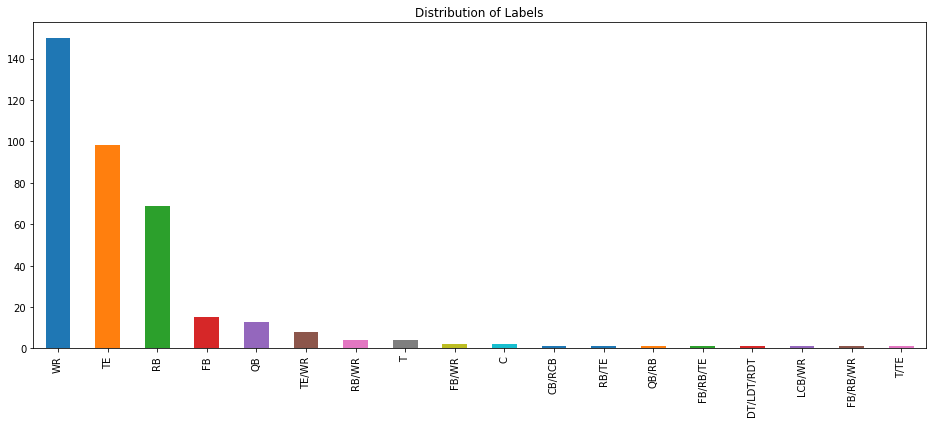

In [40]:
receiving_stats_2018['Pos'].value_counts().plot(kind = 'bar', figsize = (16, 6), title = 'Distribution of Labels');

Look at all those colors. Anyway, so what we're going to do in order to make this as faithful a calculation as possible is turn some of these awkward positions into normal position groups. I went through by hand to ensure the accuracy of this dictionary, which can be viewed in the .py file. Sorry Tyrell Williams, you're just a receiver again.

In [41]:
receiving_stats_2018 = spf.position_map_receiving(receiving_stats_2018)

Now we want to edit our values so that they match up with the ones we have in our original dataset (that is, normalized ones). We'll also drop the values that we won't be using (including our player names, because we're only using these stats to find total trends by position), and we'll also clean up the Ctch% value again.

In [42]:
receiving_stats_2018 = spf.normalize_all_receiving(receiving_stats_2018)
receiving_stats_2018.head()

,Age,Pos,G,GS,Tgt/G,Rec/G,Receiving Yds/Rec,Receiving Yds/G,Receiving TD/G,Catch Percentage
0,29,WR,16,16,10.625000,7.062500,14.8,104.8,0.500000,0.664706
1,26,WR,15,15,11.266667,7.400000,12.5,92.4,0.866667,0.656805
2,30,WR,15,15,11.200000,6.933333,12.5,86.5,1.000000,0.619048
3,22,WR,16,13,10.375000,6.937500,12.8,89.1,0.437500,0.668675
4,26,WR,16,16,10.187500,7.187500,13.7,98.3,0.687500,0.705521


### Changing Statistics to Percentiles

And now we're at a point that we can extract values to compare to our players stats. What I'm going to do next is find what percentile for the league each player's statistic is in based on their position, by creating dictionaries (there's an example in the cell below) out of the overall receiving stats where the keys are positions and the values are lists of the values of the statistic.

In [43]:
tgt_per_game = receiving_stats_2018.groupby('Pos').apply(lambda x : x['Tgt/G'].tolist()).to_dict()
tgt_per_game

{'RB': [7.75,
  7.6875,
  7.5625,
  7.0,
  6.333333333333333,
  5.6875,
  5.0625,
  5.0625,
  5.785714285714286,
  5.571428571428571,
  4.75,
  4.5625,
  5.461538461538462,
  4.1875,
  5.5,
  3.875,
  3.9285714285714284,
  3.7857142857142856,
  4.454545454545454,
  4.0,
  3.1333333333333333,
  3.2857142857142856,
  2.75,
  2.8,
  2.5625,
  3.9,
  2.1875,
  3.1818181818181817,
  2.9166666666666665,
  2.5,
  2.2142857142857144,
  3.875,
  2.0714285714285716,
  1.8125,
  1.8125,
  2.1538461538461537,
  1.8666666666666667,
  2.25,
  1.6875,
  3.25,
  1.625,
  1.625,
  1.625,
  2.1666666666666665,
  1.5,
  1.7142857142857142,
  1.5,
  1.7692307692307692,
  3.8333333333333335,
  1.4666666666666666,
  2.1,
  1.6153846153846154,
  3.3333333333333335,
  2.5,
  1.4285714285714286,
  1.4615384615384615,
  1.7272727272727273,
  1.125,
  2.5714285714285716,
  1.0625,
  1.1428571428571428,
  2.5,
  0.9375,
  1.0833333333333333,
  0.9285714285714286,
  2.4,
  0.75,
  0.8461538461538461,
  1.25,
  0.6

We can now use these lists to find what percentile each of our players are for their relative receiving stats, and then use this information to determine their talent.

In [44]:
sf_players_percentiles = spf.receiving_percentiles(receiving_stats_2018, sf_players)
sf_players_percentiles

,Pos,Player,Age,Wt,Ht,College/Univ,Drafted (tm/rnd/yr),G,GS,Touch/G,Rush TD/G,Rush Att/G,Rush Yds/Att,Rush Yds/G,Catch Percentage Percentile,Tgt/G Percentile,Rec/G Percentile,Receiving Yds/Rec Percentile,Receiving Yds/G Percentile,Receiving TD/G Percentile
0,RB,Alfred Morris,30.0,224.0,5-10,Florida Atlantic,Washington Redskins / 6th / 173rd pick / 2012,12.0,1.0,9.916667,0.166667,9.250000,3.855856,35.666667,8.108108,10.810811,9.459459,78.378378,16.216216,22.297297
1,RB,Matt Breida,23.0,190.0,5-10,Georgia Southern,NaN,30.0,13.0,10.200000,0.166667,8.600000,4.957364,42.633333,32.432432,45.945946,43.243243,78.378378,51.351351,61.486486
2,WR,Dante Pettis,23.0,195.0,6-1,Washington,San Francisco 49ers / 2nd / 44th pick / 2018,12.0,7.0,2.333333,0.000000,0.083333,-2.000000,-0.166667,36.754967,42.384106,44.039735,94.701987,58.940397,81.456954
3,WR,Marquise Goodwin,28.0,180.0,5-9,Texas,Buffalo Bills / 3rd / 78th pick / 2013,27.0,24.0,3.222222,0.000000,0.296296,6.625000,1.962963,15.231788,64.238411,54.966887,94.039735,74.834437,52.649007
4,WR,Pierre Garcon,32.0,211.0,6-0,Mount Union,Indianapolis Colts / 6th / 205th pick / 2008,16.0,16.0,4.000000,0.000000,0.000000,NaN,0.000000,26.490066,84.768212,74.172185,43.708609,72.847682,17.549669
5,WR,Kendrick Bourne,23.0,203.0,6-1,East. Washington,NaN,27.0,8.0,2.148148,0.000000,0.000000,NaN,0.000000,29.139073,41.059603,41.059603,55.629139,41.059603,43.046358
6,TE,George Kittle,25.0,250.0,6-4,Iowa,San Francisco 49ers / 5th / 146th pick / 2017,31.0,23.0,4.258065,0.000000,0.032258,10.000000,0.322581,40.566038,94.339623,94.339623,85.849057,97.169811,76.415094


Before we make any more cuts or conclusions, for the sake of uniformity, I'll do the same thing that we did for the receiving statistics to the rushing statistics, and then perform both transformations to the Rams dataset as well. These steps will have a lot less explanation to them, but don't worry too much, because it's pretty much the exact same process, just with different columns and values.

In [45]:
rushing_stats_2018 = pd.read_csv('data/NFLRushingStats2018.csv', skiprows = [0])
rushing_stats_2018.head()

,Rk,Player,Tm,Age,Pos,G,GS,Att,Yds,TD,Lng,Y/A,Y/G,Fmb
0,1,Ezekiel Elliott*\ElliEz00,DAL,23,RB,15,15,304,1434,6,41,4.7,95.6,6
1,2,Saquon Barkley*\BarkSa00,NYG,21,RB,16,16,261,1307,11,78,5.0,81.7,0
2,3,David Johnson\JohnDa08,ARI,27,RB,16,16,258,940,7,53,3.6,58.8,3
3,4,Todd Gurley*+\GurlTo01,LAR,24,RB,14,14,256,1251,17,36,4.9,89.4,1
4,5,Adrian Peterson\PeteAd01,WAS,33,RB,16,16,251,1042,7,90,4.2,65.1,3


In [46]:
rushing_stats_2018 = rushing_stats_2018.dropna(subset = ['Pos'])
rushing_stats_2018['Pos'] = rushing_stats_2018.Pos.apply(lambda x : str(x).upper())

In [47]:
rushing_stats_2018 = spf.position_map_receiving(rushing_stats_2018)

In [48]:
rushing_stats_2018 = spf.normalize_all_rushing(rushing_stats_2018)

In [49]:
sf_players_percentiles = spf.rushing_percentiles(rushing_stats_2018, sf_players_percentiles)
sf_players_percentiles

,Pos,Player,Age,Wt,Ht,College/Univ,Drafted (tm/rnd/yr),G,GS,Touch/G,Catch Percentage Percentile,Tgt/G Percentile,Rec/G Percentile,Receiving Yds/Rec Percentile,Receiving Yds/G Percentile,Receiving TD/G Percentile,Rush Att/G Percentile,Rush TD/G Percentile,Rush Yds/Att Percentile,Rush Yds/G Percentile
0,RB,Alfred Morris,30.0,224.0,5-10,Florida Atlantic,Washington Redskins / 6th / 173rd pick / 2012,12.0,1.0,9.916667,8.108108,10.810811,9.459459,78.378378,16.216216,22.297297,41.891892,33.108108,28.378378,43.243243
1,RB,Matt Breida,23.0,190.0,5-10,Georgia Southern,NaN,30.0,13.0,10.200000,32.432432,45.945946,43.243243,78.378378,51.351351,61.486486,37.837838,33.108108,81.081081,52.702703
2,WR,Dante Pettis,23.0,195.0,6-1,Washington,San Francisco 49ers / 2nd / 44th pick / 2018,12.0,7.0,2.333333,36.754967,42.384106,44.039735,94.701987,58.940397,81.456954,17.901235,45.679012,8.641975,7.407407
3,WR,Marquise Goodwin,28.0,180.0,5-9,Texas,Buffalo Bills / 3rd / 78th pick / 2013,27.0,24.0,3.222222,15.231788,64.238411,54.966887,94.039735,74.834437,52.649007,55.555556,45.679012,62.962963,66.666667
4,WR,Pierre Garcon,32.0,211.0,6-0,Mount Union,Indianapolis Colts / 6th / 205th pick / 2008,16.0,16.0,4.000000,26.490066,84.768212,74.172185,43.708609,72.847682,17.549669,0.000000,45.679012,NaN,14.814815
5,WR,Kendrick Bourne,23.0,203.0,6-1,East. Washington,NaN,27.0,8.0,2.148148,29.139073,41.059603,41.059603,55.629139,41.059603,43.046358,0.000000,45.679012,NaN,14.814815
6,TE,George Kittle,25.0,250.0,6-4,Iowa,San Francisco 49ers / 5th / 146th pick / 2017,31.0,23.0,4.258065,40.566038,94.339623,94.339623,85.849057,97.169811,76.415094,0.000000,44.444444,88.888889,44.444444


In [50]:
rams_players_percentiles =  spf.receiving_percentiles(receiving_stats_2018, rams_players)
rams_players_percentiles = spf.rushing_percentiles(rushing_stats_2018, rams_players_percentiles)

In [78]:
sf_players_percentiles

,Pos,Player,Age,Wt,Ht,College/Univ,Drafted (tm/rnd/yr),G,GS,Touch/G,Catch Percentage Percentile,Tgt/G Percentile,Rec/G Percentile,Receiving Yds/Rec Percentile,Receiving Yds/G Percentile,Receiving TD/G Percentile,Rush Att/G Percentile,Rush TD/G Percentile,Rush Yds/Att Percentile,Rush Yds/G Percentile
0,RB,Alfred Morris,30.0,224.0,5-10,Florida Atlantic,Washington Redskins / 6th / 173rd pick / 2012,12.0,1.0,9.916667,8.108108,10.810811,9.459459,78.378378,16.216216,22.297297,41.891892,33.108108,28.378378,43.243243
1,RB,Matt Breida,23.0,190.0,5-10,Georgia Southern,NaN,30.0,13.0,10.200000,32.432432,45.945946,43.243243,78.378378,51.351351,61.486486,37.837838,33.108108,81.081081,52.702703
2,WR,Dante Pettis,23.0,195.0,6-1,Washington,San Francisco 49ers / 2nd / 44th pick / 2018,12.0,7.0,2.333333,36.754967,42.384106,44.039735,94.701987,58.940397,81.456954,17.901235,45.679012,8.641975,7.407407
3,WR,Marquise Goodwin,28.0,180.0,5-9,Texas,Buffalo Bills / 3rd / 78th pick / 2013,27.0,24.0,3.222222,15.231788,64.238411,54.966887,94.039735,74.834437,52.649007,55.555556,45.679012,62.962963,66.666667
4,WR,Pierre Garcon,32.0,211.0,6-0,Mount Union,Indianapolis Colts / 6th / 205th pick / 2008,16.0,16.0,4.000000,26.490066,84.768212,74.172185,43.708609,72.847682,17.549669,0.000000,45.679012,NaN,14.814815
5,WR,Kendrick Bourne,23.0,203.0,6-1,East. Washington,NaN,27.0,8.0,2.148148,29.139073,41.059603,41.059603,55.629139,41.059603,43.046358,0.000000,45.679012,NaN,14.814815
6,TE,George Kittle,25.0,250.0,6-4,Iowa,San Francisco 49ers / 5th / 146th pick / 2017,31.0,23.0,4.258065,40.566038,94.339623,94.339623,85.849057,97.169811,76.415094,0.000000,44.444444,88.888889,44.444444


## Analysis of Players 'Success'

And so after all of that preprocessing (oh don't worry there's more, we still have all our college and combine data after all) we've taken our skill position players for each team, found their statistics, and then put their statistics in terms of how they compare to other players at their position. We can now use this information to quantitatively measure whether or not a player is successful in these schemes, and then choose the players to select as our prototypes to compare against college players. Let's start with the Rams this time:

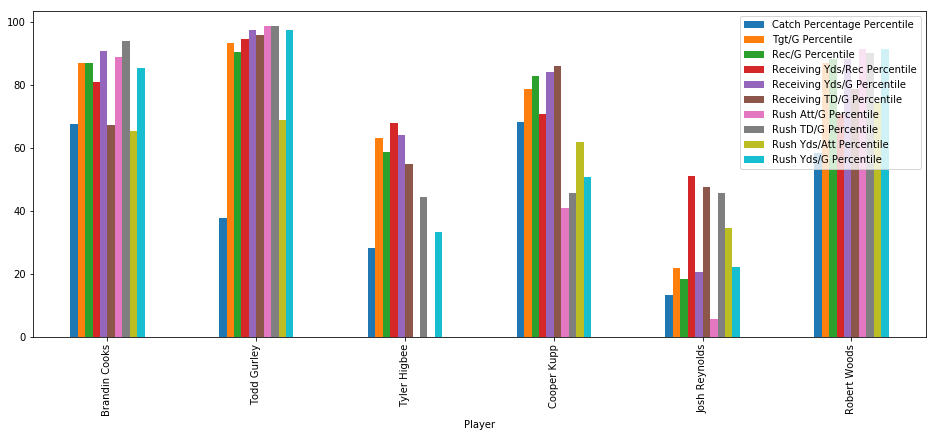

In [52]:
rams_players_percentiles.drop(['Age', 'Wt', 'G', 'GS', 'Touch/G'], axis = 1).plot(x = 'Player', kind = 'bar', figsize = (16, 6));

In [53]:
rams_players_percentiles

,Pos,Player,Age,Wt,Ht,College/Univ,Drafted (tm/rnd/yr),G,GS,Touch/G,Catch Percentage Percentile,Tgt/G Percentile,Rec/G Percentile,Receiving Yds/Rec Percentile,Receiving Yds/G Percentile,Receiving TD/G Percentile,Rush Att/G Percentile,Rush TD/G Percentile,Rush Yds/Att Percentile,Rush Yds/G Percentile
0,WR,Brandin Cooks,25.0,183.0,5-10,Oregon St.,New Orleans Saints / 1st / 20th pick / 2014,16.0,16.0,5.625000,67.549669,86.754967,86.754967,80.794702,90.728477,67.218543,88.888889,93.827160,65.432099,85.185185
1,RB,Todd Gurley,24.0,224.0,6-1,Georgia,St. Louis Rams / 1st / 10th pick / 2015,29.0,29.0,22.689655,37.837838,93.243243,90.540541,94.594595,97.297297,95.945946,98.648649,98.648649,68.918919,97.297297
2,TE,Tyler Higbee,25.0,255.0,6-6,Western Kentucky,Los Angeles Rams / 4th / 110th pick / 2016,32.0,32.0,1.531250,28.301887,63.207547,58.490566,67.924528,64.150943,54.716981,0.000000,44.444444,NaN,33.333333
3,WR,Cooper Kupp,25.0,208.0,6-2,East. Washington,Los Angeles Rams / 3rd / 69th pick / 2017,23.0,14.0,4.608696,68.211921,78.807947,82.781457,70.860927,84.105960,86.092715,40.740741,45.679012,61.728395,50.617284
4,WR,Josh Reynolds,23.0,196.0,6-3,Texas A&M,Los Angeles Rams / 4th / 117th pick / 2017,32.0,9.0,1.312500,13.245033,21.854305,18.211921,50.993377,20.529801,47.682119,5.555556,45.679012,34.567901,22.222222
5,WR,Robert Woods,26.0,195.0,6-0,USC,Buffalo Bills / 2nd / 41st pick / 2013,28.0,27.0,5.821429,58.278146,86.754967,88.079470,70.860927,88.079470,78.807947,91.358025,90.123457,74.074074,91.358025


- `Todd Gurley`: has earned his status as an Elite player in this league (maybe play him in the SuperBowl if you get the chance), as he ranks over the 90th percentile in receptions per game, yards per reception, receiving yards per game, receiving touchdowns per game, and rush yards per game amongst running backs, all while maintaining heavy usage, ranking above the 90th percentile in targets per game and rush attempts per game. He is certainly a player to use as a model for future picks at running back, regardless of scheme.


- `Brandin Cooks`: while not necessarily elite, he is certainly in the realm of really, really good. His statistics, both for receiving and rushing for a receiver, almost all lie around the 85th percentile, with the exception of catch percentage percentile, receiving touchdowns per game, and rush yards per attempt.


- `Tyler Higbee`: his statistics strike us as remarkably average, except in catch rate, where he's remarkably BELOW average. He has no statistics that lie above the 70th percentile for tight ends, and seems to not necessarily be just a mediocre tight end, at least in this offense.


- `Cooper Kupp`: certainly a good starter in this scheme, especially when only considering his receiving statistics (his rushing statistics are all below average, except for yards per attempt). Regardless, he still makes his mark on the offense, ranking near the 80th percentile in almost every major receiving category.


- `Josh Reynolds`: a disappointing surprise for me, as I expected his percentiles to be higher due to some pretty solid athleticism and opportunities. However, all but one of his statistics fall severely below the fiftieth percentile, with many lying in the twenties and teens.


- `Robert Woods`: somewhere between Kupp and Cooks (aka between good and really good), as while he isn't as consistent as Kupp in terms of percentiles across categories, he provides more of a running threat, and is more productive when he does catch the ball.

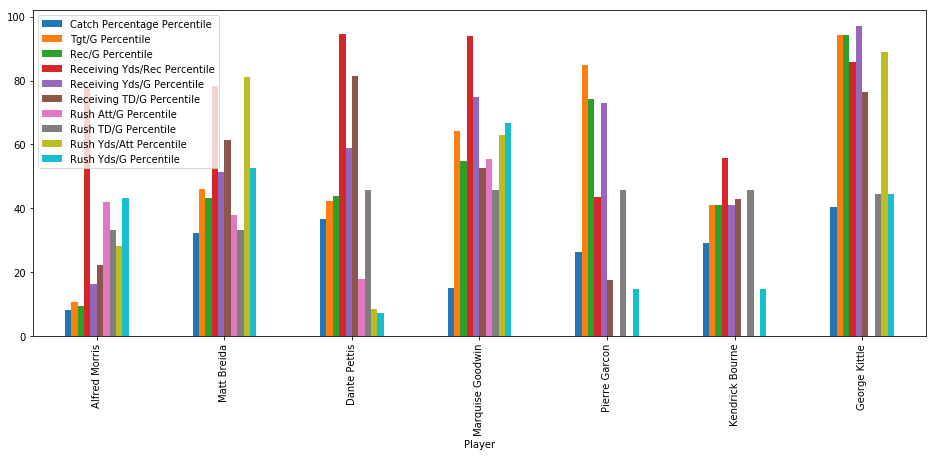

In [54]:
sf_players_percentiles.drop(['Age', 'Wt', 'G', 'GS', 'Touch/G'], axis = 1).plot(x = 'Player', kind = 'bar', figsize = (16, 6));

In [49]:
sf_players_percentiles

,Pos,Player,Age,Wt,Ht,College/Univ,Drafted (tm/rnd/yr),G,GS,Touch/G,Catch Percentage Percentile,Tgt/G Percentile,Rec/G Percentile,Receiving Yds/Rec Percentile,Receiving Yds/G Percentile,Receiving TD/G Percentile,Rush Att/G Percentile,Rush TD/G Percentile,Rush Yds/Att Percentile,Rush Yds/G Percentile
0,RB,Alfred Morris,30.0,224.0,5-10,Florida Atlantic,Washington Redskins / 6th / 173rd pick / 2012,12.0,1.0,9.916667,8.108108,10.810811,9.459459,78.378378,16.216216,22.297297,41.891892,33.108108,28.378378,43.243243
1,RB,Matt Breida,23.0,190.0,5-10,Georgia Southern,NaN,30.0,13.0,10.200000,32.432432,45.945946,43.243243,78.378378,51.351351,61.486486,37.837838,33.108108,81.081081,52.702703
2,WR,Dante Pettis,23.0,195.0,6-1,Washington,San Francisco 49ers / 2nd / 44th pick / 2018,12.0,7.0,2.333333,36.754967,42.384106,44.039735,94.701987,58.940397,81.456954,17.901235,45.679012,8.641975,7.407407
3,WR,Marquise Goodwin,28.0,180.0,5-9,Texas,Buffalo Bills / 3rd / 78th pick / 2013,27.0,24.0,3.222222,15.231788,64.238411,54.966887,94.039735,74.834437,52.649007,55.555556,45.679012,62.962963,66.666667
4,WR,Pierre Garcon,32.0,211.0,6-0,Mount Union,Indianapolis Colts / 6th / 205th pick / 2008,16.0,16.0,4.000000,26.490066,84.768212,74.172185,43.708609,72.847682,17.549669,0.000000,45.679012,NaN,14.814815
5,WR,Kendrick Bourne,23.0,203.0,6-1,East. Washington,NaN,27.0,8.0,2.148148,29.139073,41.059603,41.059603,55.629139,41.059603,43.046358,0.000000,45.679012,NaN,14.814815
6,TE,George Kittle,25.0,250.0,6-4,Iowa,San Francisco 49ers / 5th / 146th pick / 2017,31.0,23.0,4.258065,40.566038,94.339623,94.339623,85.849057,97.169811,76.415094,0.000000,44.444444,88.888889,44.444444


**A Preface**: the Niners provide a slight challenge, as one can attempt to make excuses for a lot of poor performances by pointing to the rotation at quarterback. However, while we should keep this in mind, it's important to still be critical of unimpressive statistics.

- `Alfred Morris`: he needed more analysis earlier, but now it's safe to say that he's just not very good, at least in this scheme. With a catch percentage lying in the abysmally low 8th percentile, there are almost no statistical positives to his game since coming to San Francisco, aside from yards per reception. He's still left searching for that magic he had in Washington all those years ago.


- `Matt Breida`: an UDFA, Breida has average to slightly below average stats, except in two categories, but those categories stand out to me, as they are yards per reception and yards per rushing attempt. These two statistics both hint to me that Breida has enough talent to make noise with more usage (he was below average in both targets and rushing attempts)


- `Dante Pettis`: A rookie out of Washington, Pettis intrigues me because, while his percentiles are all over the map, the two extraordinarily high percentiles he had were in yards per reception and receiving touchdowns per game, in the 95th and 80th percentiles, respectively. These two values are indicative of some serious big play ability, and if he can manage to get the other parts of his game up from the average state they are currently in, he has a lot of room for growth, especially as a rookie.


- `Marquise Goodwin`: While several of his stats are average, we do have to remember that there was severely inconsistent quarterback play, and he still had average to above average numbers in a lot of categories, with big play ability indicated by his incredibly high yards per reception numbers. He really needs to pick up his catch numbers though (15th percentile in catch percentage. Not EVERYTHING is on the quarterback when you've got the lowest catch rate on your team).


- `Pierre Garcón`: With very high usage numbers (84th percentile) comes the expectation of higher production. But this just didn't materialize for Garcón, as his catch percentage rate is the second lowest on the team, but without nearly any of the promising markers that Goodwin had.


- `Kendrick Bourne`: Just a Guy, slightly below average, nothing much special.


- `George Kittle`: Super. Star. Two words, all you need to know. High 90th percentile in every category, including in targets per game. Consistently dominant

## Players to Use as Prototypes

Ultimately, we come to the conclusion that the players that are the most successful in this system are:

| Player | Position |
|---|---|
| Todd Gurley | RB |
| Brandin Cooks | WR |
| Cooper Kupp | WR |
| Robert Woods | WR |
| Matt Breida | RB |
| Dante Pettis | WR |
| Marquise Goodwin | WR |
| George Kittle | TE |

For those of you who skipped ahead, good decision, but let me at least explain how we got here so you're not left spinning around wondering where you are and what year it is. To be brief, we pretty much went through Rams and 49ers skill players, getting rid of those who didn't get much playing time, and then compared some of their statistics to those of others at their position in the league. We took those who compared favorably to their peers in a majority of categories or in categories that we felt indicated room for improvement (especially in a San Francisco offense stunted by poor Quarterback play).

Next, we will find these players college statistics, level of competition, and their combine numbers, in order to hopefully find similarities in college players today.

In [50]:
prototypes_names = ['Todd Gurley', 'Brandin Cooks', 'Cooper Kupp', 
              'Robert Woods', 'Matt Breida', 'Dante Pettis', 'Marquise Goodwin', 'George Kittle']

***

# Incorporating College Statistics

## Creating Original Prototypes DataFrame
I hope you weren't tired of cleaning and preprocessing data! No but seriously, there's a lot more. Skip this part if you don't fear for your sanity. We're going to go back to our original skill position datasets in order to find this data, as it is has less entries to work with while still letting us know when and from where people were drafted.

In [51]:
prototypes = spf.create_prototypes(sf_skill_positions, rams_skill_positions)
prototypes

,Player,Age,Wt,Ht,College/Univ,Drafted (tm/rnd/yr)
0,Matt Breida,23.0,190.0,5-10,Georgia Southern,NaN
1,Dante Pettis,23.0,195.0,6-1,Washington,San Francisco 49ers / 2nd / 44th pick / 2018
2,Marquise Goodwin,28.0,180.0,5-9,Texas,Buffalo Bills / 3rd / 78th pick / 2013
3,George Kittle,25.0,250.0,6-4,Iowa,San Francisco 49ers / 5th / 146th pick / 2017
4,Brandin Cooks,25.0,183.0,5-10,Oregon St.,New Orleans Saints / 1st / 20th pick / 2014
5,Todd Gurley,24.0,224.0,6-1,Georgia,St. Louis Rams / 1st / 10th pick / 2015
6,Cooper Kupp,25.0,208.0,6-2,East. Washington,Los Angeles Rams / 3rd / 69th pick / 2017
7,Robert Woods,26.0,195.0,6-0,USC,Buffalo Bills / 2nd / 41st pick / 2013


## Getting the College Data

This data brought to you by: __[Sports Reference College Football](https://www.sports-reference.com/cfb/)__. I'll first be loading in DataFrames for each player above using glob (just so I don't have to do as much typing).

In [81]:
file_list = glob.glob('data/*College.csv')
for file in file_list:
    exec(file[5:-11] + ' = pd.read_csv(file, skiprows = [0])')

This made it so that each player's statistics are in a DataFrame assigned to a that player's name. For instance:

In [82]:
display(CooperKupp)
display(BrandinCooks)

,Year,Team,G,Rush,Yds,Yd/Rush,TDs,Rec,Yds.1,Yd/Rec,TDs.1
0,2013,EastWa,15,1,13,13.0,0,93,1691,18.2,21
1,2014,EastWa,13,1,10,10.0,0,104,1431,13.8,16
2,2015,EastWa,11,1,2,2.0,0,114,1642,14.4,19
3,2016,EastWa,13,14,33,2.4,1,117,1700,14.5,17
4,Career,NaN,52,17,58,3.4,1,428,6464,15.1,73


,Year,School,Conf,Class,Pos,G,Rec,Yds,Avg,TD,Att,Yds.1,Avg.1,TD.1,Plays,Yds.2,Avg.2,TD.2
0,2011,Oregon State,Pac-12,FR,WR,12.0,31,391,12.6,3,10,41,4.1,0,41,432,10.5,3
1,*2012,Oregon State,Pac-12,SO,WR,13.0,67,1151,17.2,5,19,82,4.3,0,86,1233,14.3,5
2,*2013,Oregon State,Pac-12,JR,WR,13.0,128,1730,13.5,16,32,217,6.8,2,160,1947,12.2,18
3,Career,Oregon State,NaN,NaN,NaN,NaN,226,3272,14.5,24,61,340,5.6,2,287,3612,12.6,26


You may notice that Cooper Kupp's data is far more incomplete than any other player's. This is due to the fact that he attended a much smaller school (Eastern Washington) than any of the other players, and his records were not as complete as some of the other players.

### Cleaning the College Data

We're going to have to do similar processing of the DataFrames that we did in previous data sets. First, we need to deal with the issue of misnamed columns. Renaming the columns so that it's clear which stats are rushing and which are receiving. The runningbacks specifically have a strange set up, as they have their rushing stats listed first, while the receivers and tight ends have their receiving stats listed first.